### Lab Session:  05

In [1]:
import librosa

y, sr = librosa.load("SpeechRec.wav")

print(y)
print(sr)

[0.         0.         0.         ... 0.02295396 0.021336   0.01874966]
22050


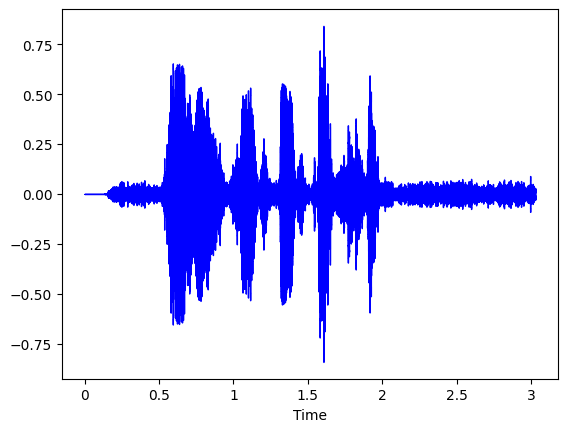

In [2]:
librosa.display.waveshow(y,color = 'blue')

In [3]:
from IPython.display import Audio
Audio(data=y, rate=sr)

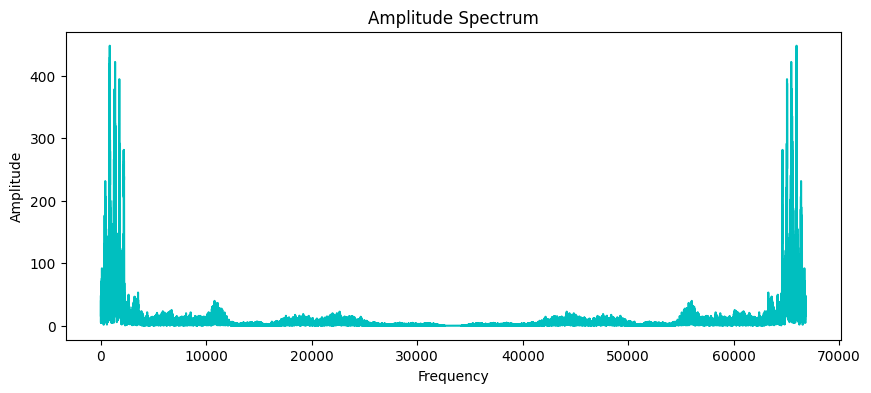

In [4]:
import numpy as np

import matplotlib.pyplot as plt

fft_result = np.fft.fft(y)
amp_spectrum = np.abs(fft_result)
# It tells the magnitudes of sinusoidal components of the wave. 

plt.figure(figsize=(10, 4))
plt.plot(amp_spectrum,"c")
plt.title('Amplitude Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

c:\Users\bnsuk\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\bnsuk\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'Original Signal')

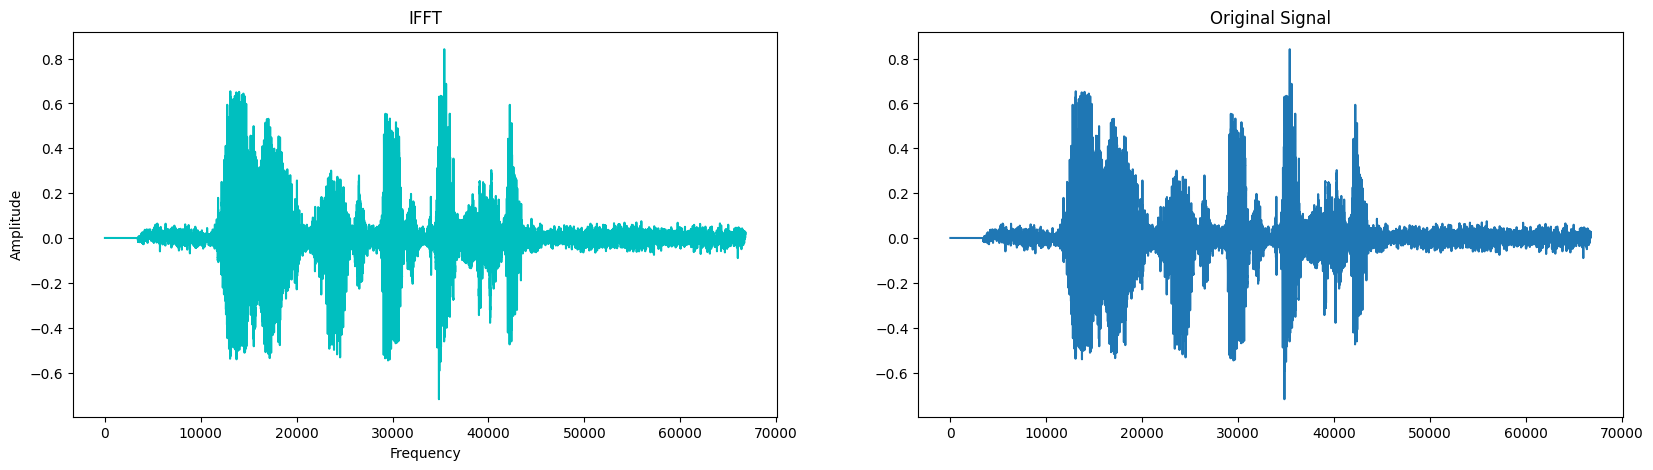

In [5]:
ifft_result = np.fft.ifft(fft_result)

# It tells the magnitudes of sinusoidal components of the wave.

plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
plt.plot(ifft_result,"c")
plt.title('IFFT')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

plt.subplot(1,2,2)
plt.plot(y)
plt.title('Original Signal')



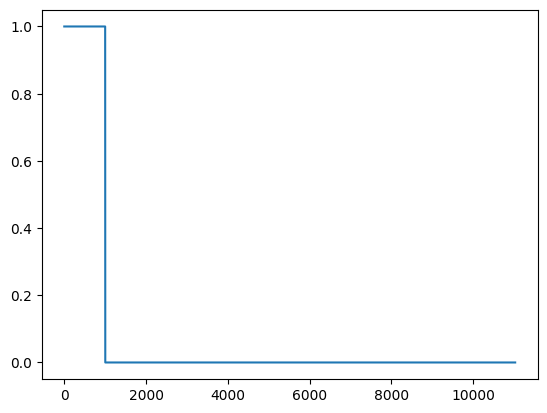

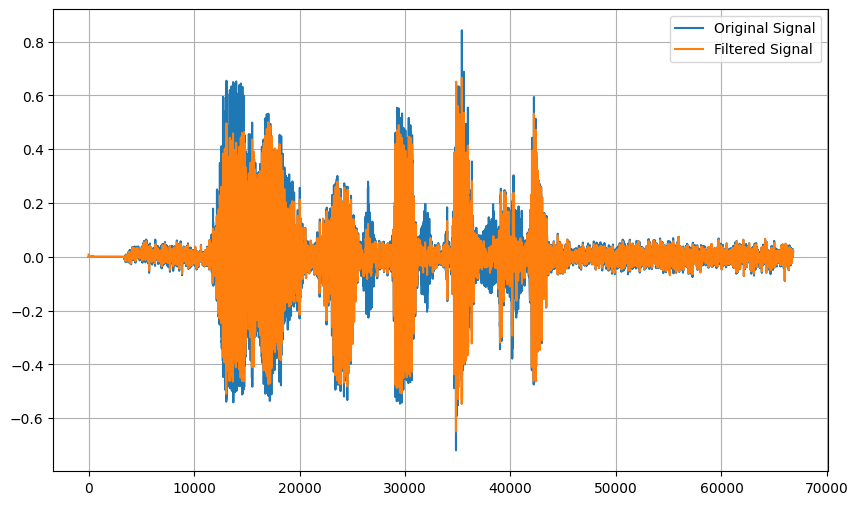

In [6]:
def rectangular_window(sl, freq, fs):
    n = len(sl)
    freqs = np.fft.rfftfreq(n, d=1/fs) 
    mask = np.abs(freqs) <= freq 
    plt.plot(freqs,mask) #low pass filter 
    y_low = np.fft.irfft(np.fft.rfft(sl) * mask, n)  
    return y_low


freq = 1000  
y_low = rectangular_window(y, freq, sr)

plt.figure(figsize=(10, 6))
plt.plot(y, label='Original Signal')
plt.plot(y_low, label='Filtered Signal')
plt.legend()
plt.grid()
plt.show()


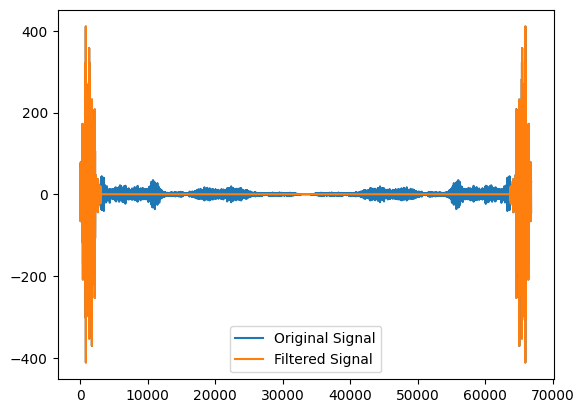

In [7]:
plt.plot(np.fft.fft(y).real,label='Original Signal');
plt.plot(np.fft.fft(y_low).real,label='Filtered Signal');
plt.legend();

In [8]:
Audio(data=y_low,rate=sr)

(33399,)
[False False False ... False False False]


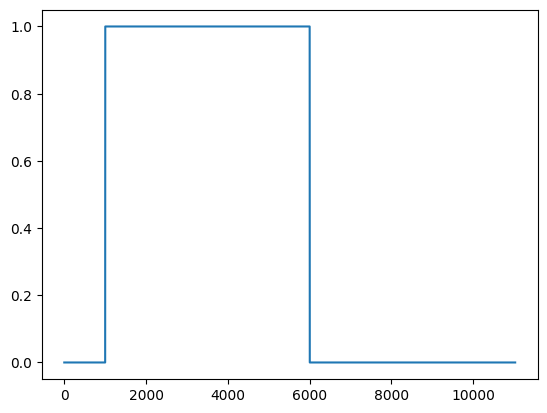

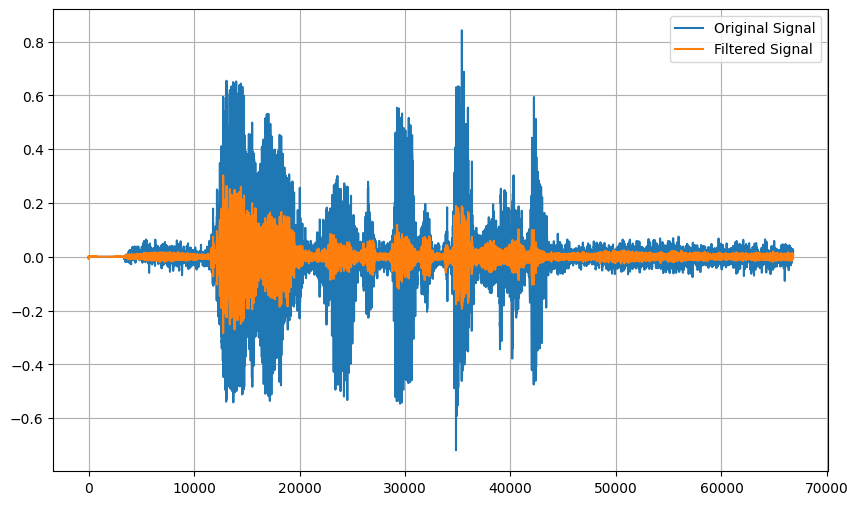

In [9]:
def rect_wind(sl, low_pass, high_pass, fs):
    n = len(sl)
    freq = np.fft.rfftfreq(n, d=1/fs) 
    mask = (np.abs(freq) >= low_pass) & (np.abs(freq) <= high_pass)
    plt.plot(freq,mask)
    print(mask.shape)
    print(mask) #band pass filter
    y_band = np.fft.irfft(np.fft.rfft(sl) * mask, n)  
    return y_band

low_pass = 1000 
high_pass = 6000
y_band = rect_wind(y, low_pass, high_pass, sr)
plt.figure(figsize=(10, 6))
plt.plot(y, label='Original Signal')
plt.plot(y_band, label='Filtered Signal')
plt.legend()
plt.grid()
plt.show()

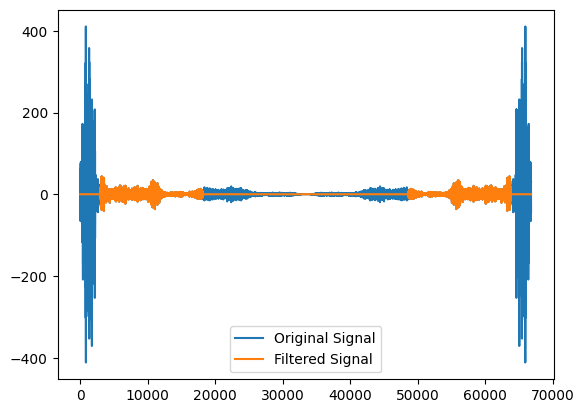

In [10]:
plt.plot(np.fft.fft(y).real,label='Original Signal')
plt.plot(np.fft.fft(y_band).real,label='Filtered Signal')
plt.legend()

In [11]:
Audio(data=y_band,rate=sr)

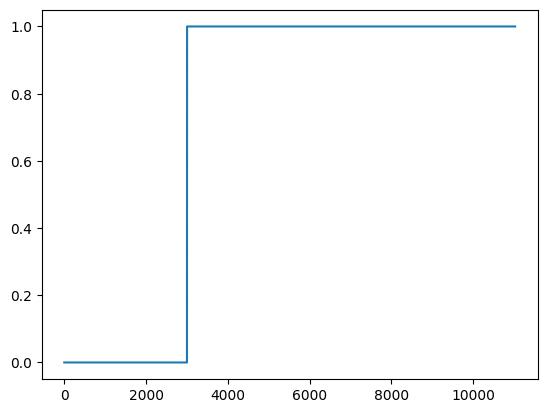

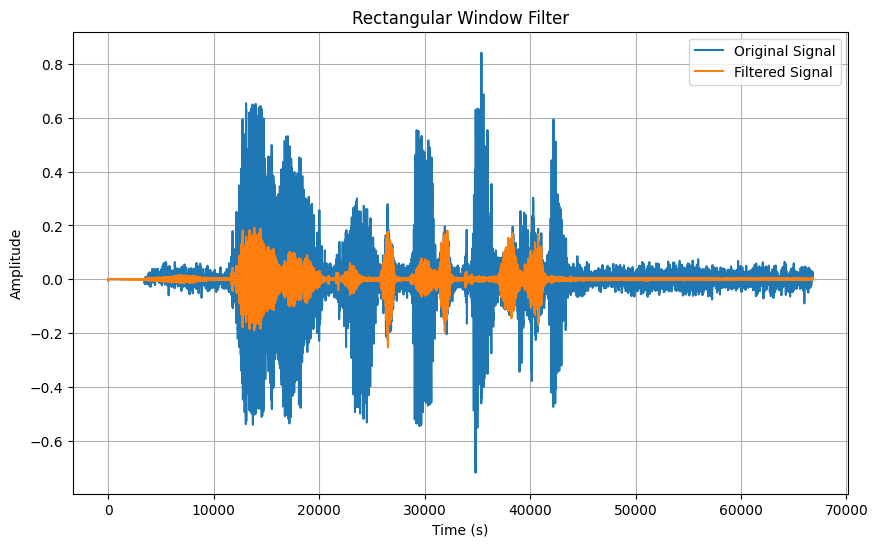

In [12]:
def rectangular_window(sl, freq, fs):
    n = len(sl)
    freqs = np.fft.rfftfreq(n, d=1/fs)  
    mask = np.abs(freqs) >= freq  
    plt.plot(freqs,mask) #high pass filter 
    filtered_signal = np.fft.irfft(np.fft.rfft(sl) * mask, n)  
    return filtered_signal


freq = 3000  
y_high = rectangular_window(y, freq, sr)

plt.figure(figsize=(10, 6))
plt.plot(y, label='Original Signal')
plt.plot(y_high, label='Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Rectangular Window Filter')
plt.legend()
plt.grid()
plt.show()

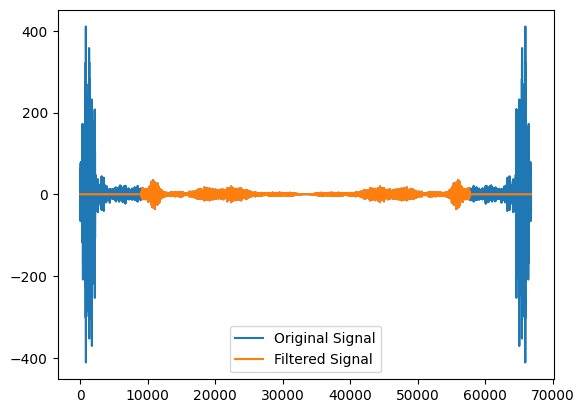

In [13]:
plt.plot(np.fft.fft(y).real,label='Original Signal');
plt.plot(np.fft.fft(y_high).real,label='Filtered Signal');
plt.legend();

In [14]:
Audio(data=y_high,rate=sr)

C:\Users\bnsuk\AppData\Local\Temp\ipykernel_31392\1748048467.py:8: DeprecationWarning: Importing cosine from 'scipy.signal' is deprecated since SciPy 1.1.0 and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.cosine' or the convenience function 'scipy.signal.get_window' instead.
  cosine_filter = cosine(win_size, np.pi * cut_freq)


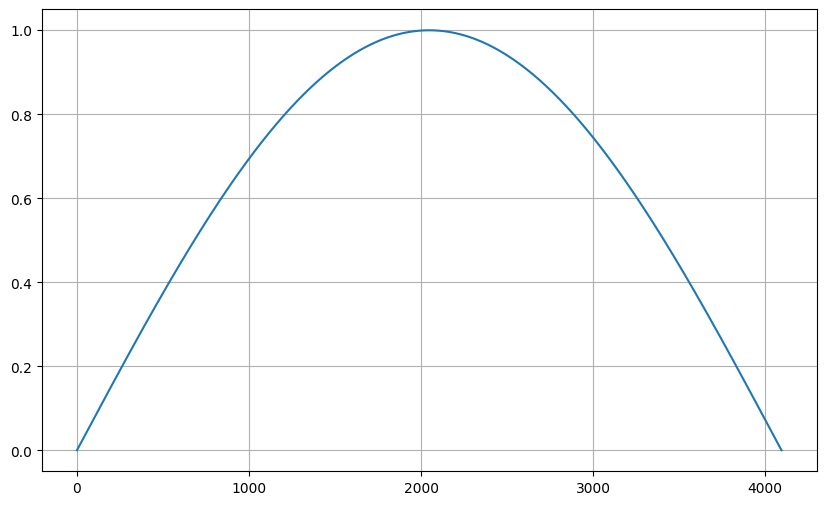

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import cosine

# cosine filter
cut_freq = 1000  
win_size = 4096 
cosine_filter = cosine(win_size, np.pi * cut_freq)


plt.figure(figsize=(10, 6))
plt.plot(cosine_filter)
plt.grid()
plt.show()

C:\Users\bnsuk\AppData\Local\Temp\ipykernel_31392\2781712508.py:5: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated since SciPy 1.1.0 and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gaussian_filter = gaussian(win_size, std=std_dev)


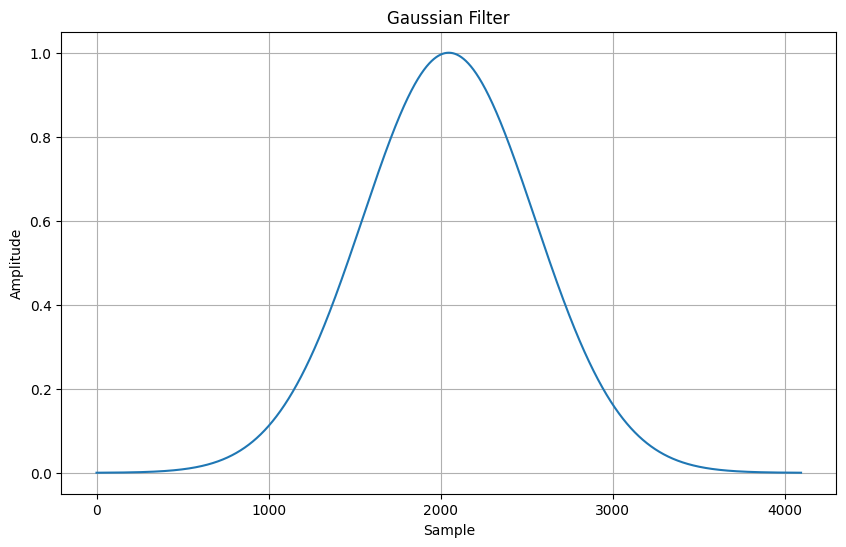

In [16]:
from scipy.signal import gaussian

# Gaussian filter
std_dev = 500 
gaussian_filter = gaussian(win_size, std=std_dev)


plt.figure(figsize=(10, 6))
plt.plot(gaussian_filter)
plt.title('Gaussian Filter')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid()
plt.show()


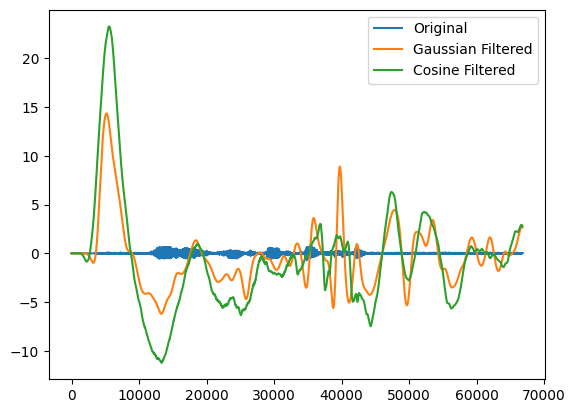

In [17]:
import librosa
from scipy.signal import convolve

y_cos = convolve(y, cosine_filter, mode='same')
y_gaussian = convolve(y, gaussian_filter, mode='same')
plt.plot(y,label="Original")
plt.plot(y_gaussian, label='Gaussian Filtered')
plt.plot(y_cos, label='Cosine Filtered')
plt.legend()

In [18]:
Audio(data=y_cos,rate=sr)

In [19]:
Audio(data=y_gaussian,rate=sr)